# Amazon Customer Data Analysis

In [2]:
#Importing necessary libraries for data preprocessing and data visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#Reading data from SQLite database
import sqlite3

In [4]:
con = sqlite3.connect(r'C:\Users\admin\OneDrive\Documents\Personal\Udemy\Data Analysis Projects\Project 3 - Amazon Customers\Project 3.. Amazon Customers Data Analysis-20230920T112147Z-001/database.sqlite')

In [5]:
type(con)

sqlite3.Connection

In [6]:
df = pd.read_sql_query("SELECT * FROM REVIEWS", con)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [7]:
df.shape

(568454, 10)

# Data Preprocessing

In [8]:
#Reading all columns of dataset
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

Defining Key Terms:

1. Helpfulness Numerator - Number of people who find the review helpful
2. Helpfulness Denominator - Number of people who indicated whether the review was useful or not

Condition for accurate data: Numerator < Denominator

If Numerator > Denominator: Invalid row

In [11]:
#Checking which rows have numerator > denominator and dropping invalid rows
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [12]:
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

In [13]:
df_valid.shape

(568452, 10)

In [18]:
#Removing duplicate rows for the following condition: If UserID, ProfileName, Time, Text are same, can be considered as duplicate
df_valid[df_valid.duplicated(['UserId', 'ProfileName', 'Time', 'Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


Out of 568452 rows, there are 174521 duplicate rows which will be dropped from the df_valid data set

In [19]:
data = df_valid.drop_duplicates(subset = ['UserId', 'ProfileName', 'Time', 'Text'])

In [20]:
data.shape

(393931, 10)

In [21]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [26]:
#Removing warnings
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [27]:
#Converting Time to DateTime dtype
data['Time'] = pd.to_datetime(data['Time'], unit = 's')

# Checking how Amazon Recommends products

Amazon will recommend more products to those users who buy more i.e., have better conversion rate.

Conversion rate - Number of times a user buys products on Amazon after checking them out.

In [28]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [29]:
data['UserId'].nunique()

256059

In [30]:
data['ProfileName'].nunique()

218418

In [32]:
data.groupby(['UserId']).agg({'Summary': 'count', 'Text': 'count', 'Score': 'mean', 'ProductId': 'count'})

,Summary,Text,Score,ProductId
UserId,,,,
#oc-R103C0QSV1DF5E,1,1,5.000000,1
#oc-R109MU5OBBZ59U,1,1,5.000000,1
#oc-R10LFEMQEW6QGZ,1,1,5.000000,1
#oc-R10LT57ZGIB140,1,1,3.000000,1
#oc-R10UA029WVWIUI,1,1,1.000000,1
...,...,...,...,...
AZZV9PDNMCOZW,3,3,4.666667,3
AZZVNIMTTMJH6,1,1,5.000000,1
AZZY649VYAHQS,1,1,5.000000,1


In [37]:
#Grouping the data by which UserId has made the most purchases i.e., has highest ProductId count
recommend_df = data.groupby(['UserId']).agg({'Summary': 'count', 'Text': 'count', 'Score': 'mean', 'ProductId': 'count'}).sort_values(by = 'ProductId', ascending = False)

In [38]:
recommend_df.columns = ['Number_of_summaries', 'Number_of_Text', 'Average_Score', 'Number_of_Products_Purchased']

In [39]:
recommend_df.head()

,Number_of_summaries,Number_of_Text,Average_Score,Number_of_Products_Purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211


In [40]:
#Returning the top 10 users with most purchases
recommend_df.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [41]:
#Returning the top 10 users with most purchases along with their purchase count
recommend_df['Number_of_Products_Purchased'][0:10]

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
A2MUGFV2TDQ47K    161
A3D6OI36USYOU1    146
AZV26LP92E6WU     129
AKMEY1BSHSDG7     119
A2GEZJHBV92EVR    118
Name: Number_of_Products_Purchased, dtype: int64

Text(0, 0.5, 'Purchase Count')

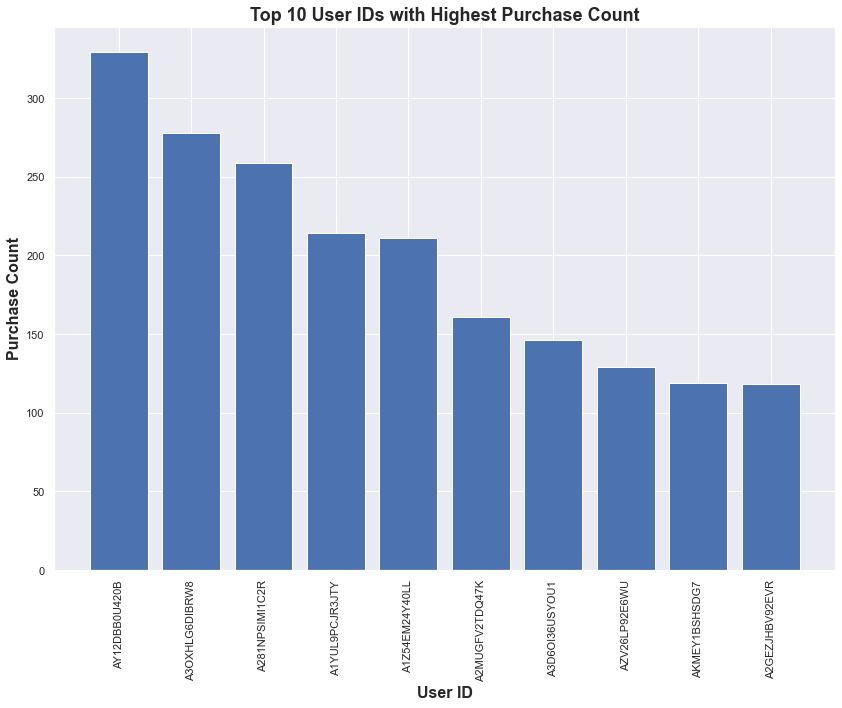

In [58]:
plt.figure(figsize = (14,10))
plt.bar(recommend_df.index[0:10], recommend_df['Number_of_Products_Purchased'][0:10].values)
plt.xticks(rotation = 90)
plt.title('Top 10 User IDs with Highest Purchase Count', fontsize = 18, weight = "bold")
plt.xlabel('User ID', fontsize = 16, weight = "bold")
plt.ylabel('Purchase Count', fontsize = 16, weight = "bold")

Plotting a bar graph for Top 10 Amazon Purchasers along with their User IDs

# Analysing which product has a good number of reviews (high review count)

In [59]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [62]:
#Number of unique Product IDs
data['ProductId'].nunique()

67624

Identify the most frequently sold products and then check for number of reviews

Condition for high frequency: If product is sold more than 500 times

In [64]:
products_count = data['ProductId'].value_counts().to_frame()

In [65]:
products_count

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1
B009858H6M,1


In [66]:
#Filtering and printing for all values greater than 500
products_count[products_count['ProductId'] > 500]

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541
B0090X8IPM,530


In [68]:
freq_prod_id = products_count[products_count['ProductId'] > 500].index

In [69]:
freq_prod_id

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object')

In [71]:
freq_prod_df = data[data['ProductId'].isin(freq_prod_id)]

In [73]:
freq_prod_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...


In [74]:
freq_prod_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='ProductId'>

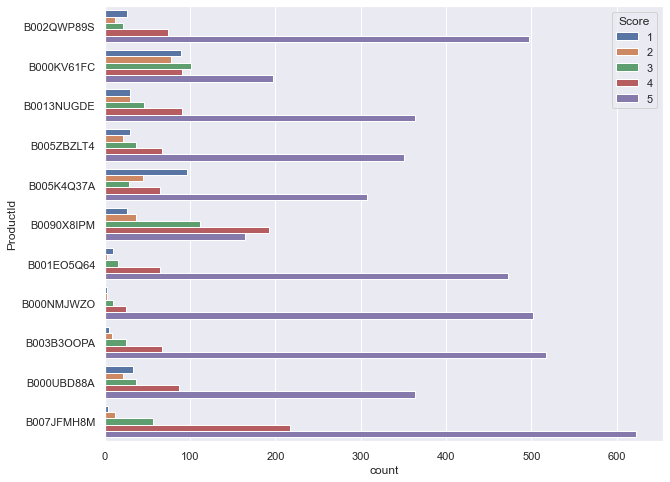

In [79]:
#Creating a count plot for most sold products and using Score as a hue parameter to indicate score of reviews per Product ID
plt.figure(figsize = (10,8))
sns.countplot(y = 'ProductId', data = freq_prod_df, hue = 'Score')

# Behaviour Analysis of Frequent Viewers and Non-Frequent Viewers

Frequent viewer: If a user has bought a product for at least 50 times

Non-frequent viewer: Less than 50

In [80]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [82]:
x = data['UserId'].value_counts()

In [85]:
#Creating a Viewer type column by applying anonymous (lambda) function
data['Viewer_Type'] = data['UserId'].apply(lambda user : "Frequent" if x[user] > 50 else "Not Frequent")

In [87]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer_Type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent


In [88]:
not_freq_df = data[data['Viewer_Type'] == "Not Frequent"]

In [89]:
freq_df = data[data['Viewer_Type'] == "Frequent"]

In [91]:
freq_df['Score'].value_counts()

5    5765
4    1979
3     897
2     368
1     349
Name: Score, dtype: int64

In [95]:
# % Distribution of frequent buyers and their ratings for product purchases
freq_df['Score'].value_counts()/len(freq_df)*100

5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: Score, dtype: float64

<AxesSubplot:>

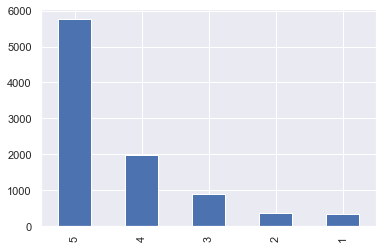

In [96]:
freq_df['Score'].value_counts().plot(kind = 'bar')

In [97]:
# % Distribution of non-frequent buyers and their ratings for product purchases
not_freq_df['Score'].value_counts()/len(not_freq_df)*100

5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: Score, dtype: float64

<AxesSubplot:>

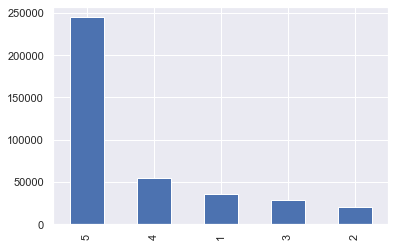

In [98]:
not_freq_df['Score'].value_counts().plot(kind = 'bar')

# Analysing Frequent Users

In [100]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Viewer_Type'],
      dtype='object')

In [101]:
#Checking if frequent users are more verbose
data['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 393931, dtype: object

In [103]:
data[['UserId', 'ProductId', 'Text']]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


In [106]:
#Converting string to list in order to be able to count the number of words in the text
len(data['Text'][0].split(' '))

49

In [107]:
def calculate_length(text):
    return len(text.split(' '))

The above function is created to convert all str Text to list type and then count the number of words in the Text.

In [109]:
data['Text_Length'] = data['Text'].apply(calculate_length)

In [110]:
data['Viewer_Type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [111]:
not_freq_data = data[data['Viewer_Type'] == "Not Frequent"]
freq_data = data[data['Viewer_Type'] == "Frequent"]

(0.0, 600.0)

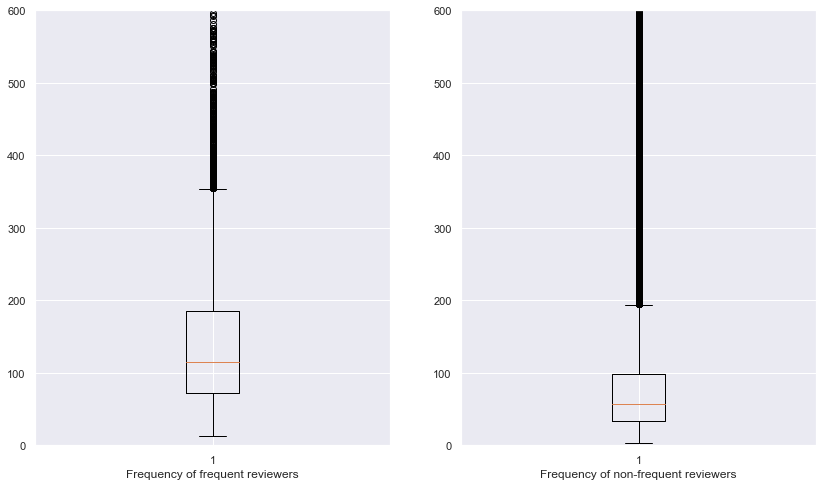

In [114]:
#Creating a box plot with 2 subplots for frequent and non-frequent reviewers
fig = plt.figure(figsize = (14, 8))

ax1 = fig.add_subplot(121)
ax1.boxplot(freq_data['Text_Length'])
ax1.set_xlabel('Frequency of frequent reviewers')
ax1.set_ylim(0, 600)

ax2 = fig.add_subplot(122)
ax2.boxplot(not_freq_data['Text_Length'])
ax2.set_xlabel('Frequency of non-frequent reviewers')
ax2.set_ylim(0, 600)

# Performing Sentiment Analysis

In [115]:
!pip install textblob

In [116]:
from textblob import TextBlob

In [118]:
data['Summary'][0]

'Good Quality Dog Food'

In [120]:
#TextBlob is a sentiment analysis package
TextBlob('Good Quality Dog Food').sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

Polarity range: -1, 0, 1

From the above result, it can be observed that the polarity is closer to 1.

In [121]:
#Creating a for loop to carry out the sentiment analysis for each summary in data
polarity = []

for text in data['Summary']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [122]:
len(polarity)

393931

In [123]:
data['polarity'] = polarity

In [124]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer_Type,Text_Length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30,0.8


In [125]:
#Finding most positive and negative keywords in feedback
data_negative = data[data['polarity'] < 0]

data_positive = data[data['polarity'] > 0]

In [128]:
from collections import Counter

In [130]:
Counter(data_negative['Summary']).most_common(10)

[('Disappointed', 426),
 ('Disappointing', 223),
 ('Not what I expected', 143),
 ('Awful', 120),
 ('disappointed', 120),
 ('Horrible', 111),
 ('Terrible', 107),
 ('Disgusting', 89),
 ('Not good', 78),
 ('Bland', 64)]

In [131]:
Counter(data_positive['Summary']).most_common(10)

[('Delicious!', 1768),
 ('Delicious', 1682),
 ('Great product', 765),
 ('Excellent', 713),
 ('Love it!', 649),
 ('Great Product', 648),
 ('Great!', 529),
 ('Great', 506),
 ('Awesome', 396),
 ('Awesome!', 394)]